### Problem Statement
To perform color compression on image using K-Means Algorithm

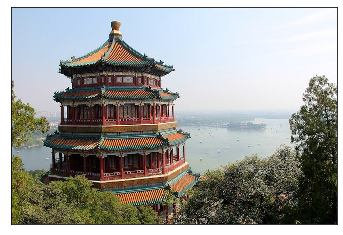

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_sample_image

#note: must install ''pillow'' package
china = load_sample_image("china.jpg")
ax    = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [2]:
#show the dimension of the array
china.shape

(427, 640, 3)

In [3]:
#reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1
data = china / 255.0  #use 0 ... 1 scale
data = data.reshape(427 * 640, 3) #adjust to dimension of the array
data.shape

(273280, 3)

In [4]:
#visualize these pizels in this color space, using a subset of 10,000 pixels for efficiency
def plot_pixels(data, title, colors=None, N=10000) :
    if colors is None :
        colors = data
    
    #choose a random subset
    rng    = np.random.RandomState(0)
    i      = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B  = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20)

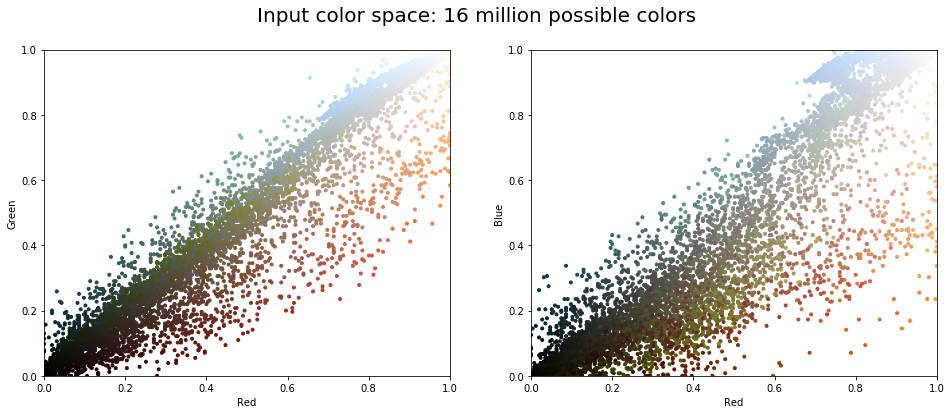

In [5]:
plot_pixels(data, title="Input color space: 16 million possible colors")

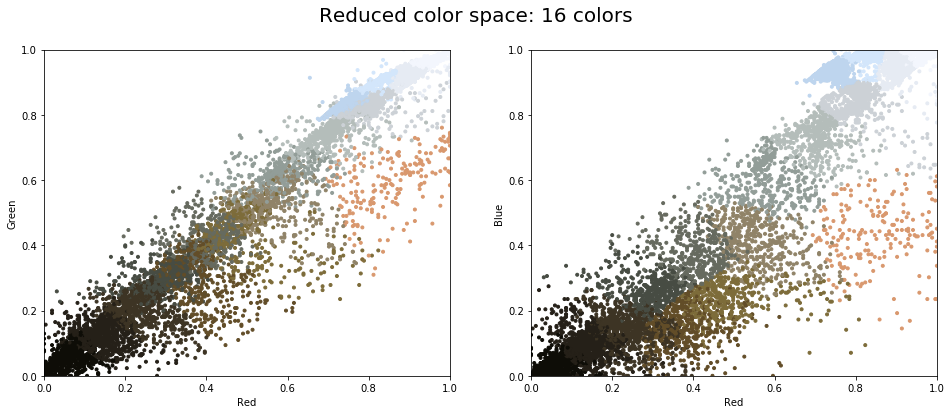

In [6]:
import warnings; warnings.simplefilter('ignore') #fix numpy issues
from sklearn.cluster import MiniBatchKMeans

#reducing these 16 million colors to just 16 colors
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title='Reduced color space: 16 colors')

Text(0.5, 1.0, '16-color Image')

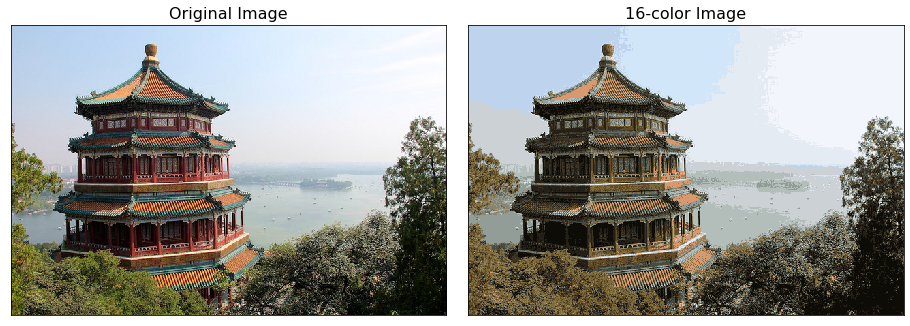

In [7]:
#the result is re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1,2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)

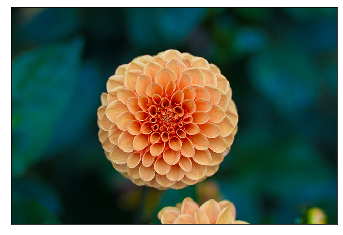

In [8]:
#try another photo
flower = load_sample_image("flower.jpg")
ax     = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [9]:
flower.shape

(427, 640, 3)

In [10]:
data_flo = flower / 255.0  #use 0 ... 1 scale
data_flo = data_flo.reshape(427 * 640, 3) #adjust to dimension of the array

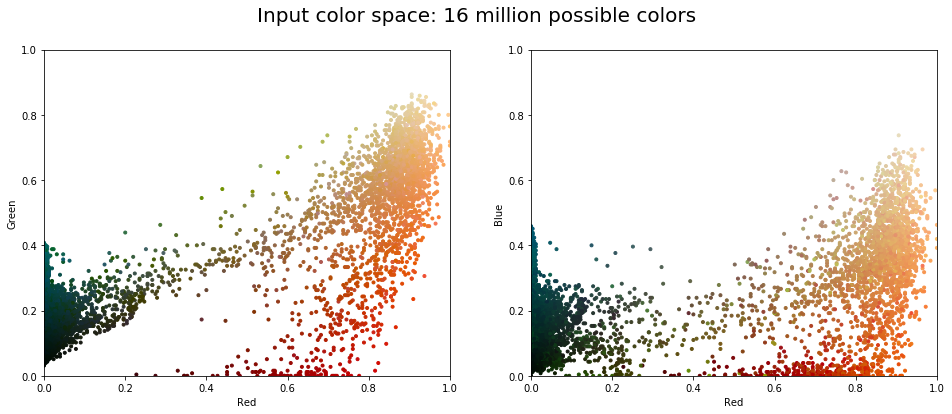

In [11]:
plot_pixels(data_flo, title="Input color space: 16 million possible colors")

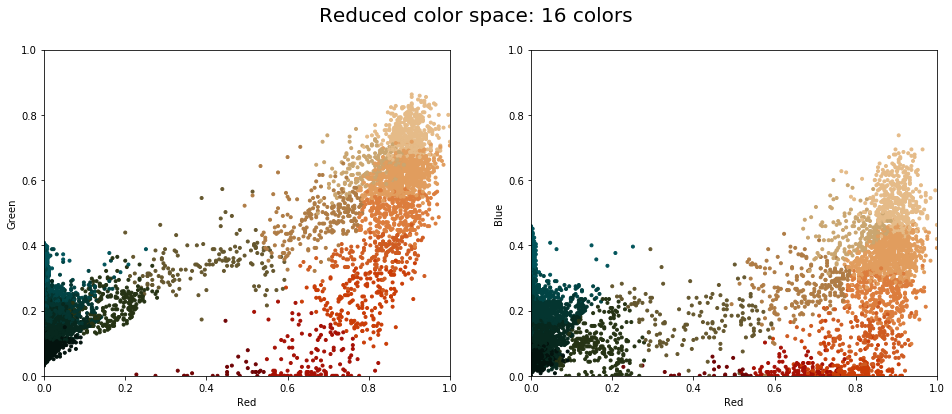

In [12]:
kmeans = MiniBatchKMeans(16)
kmeans.fit(data_flo)
new_colors_flo = kmeans.cluster_centers_[kmeans.predict(data_flo)]

plot_pixels(data_flo, colors=new_colors_flo, title='Reduced color space: 16 colors')

Text(0.5, 1.0, '16-color Image')

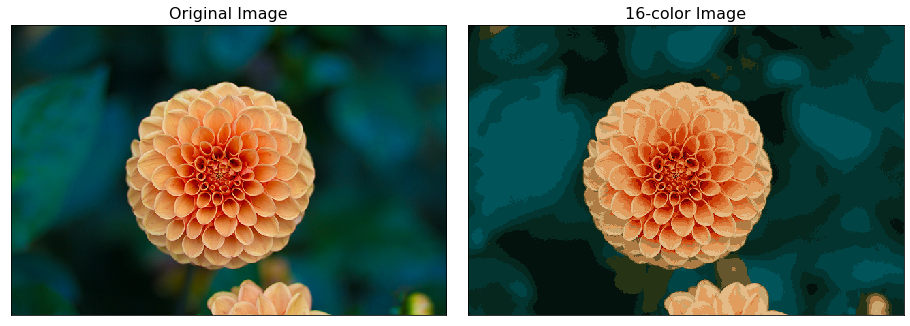

In [13]:
flower_recolored = new_colors_flo.reshape(flower.shape)
fig, ax = plt.subplots(1,2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16)